# Entendimiento de los datos

Para ilustrar el proceso de entendimiento de los datos, vamos a utilizar el dataset mas conocido y estudiado del aprendizaje automático (el "hola mundo" de la analítica): el dataset de flores Iris.
Este consta de 150 instancias de flores, clasificadas en 3 categorías posibles (iris-virginica, iris-setosa, iris-versicolor, cada una con 50 instancias), descritas a partir de 4 atributos (largo y ancho del pétalo, largo y ancho del sépalo).

Importamos las librerías que vamos a utilizar

In [1]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import math
import matplotlib.pyplot as plt #gráficos
import seaborn as sns
from sklearn import datasets
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score, cross_validate #método para evaluar varios particionamientos de C-V
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, LeaveOneOut #Iteradores de C-V

Vamos a ignorar los warnings que no son importantes para lo que vamos a hacer

In [2]:
import warnings
warnings.filterwarnings('ignore')

Cargamos los datos para entenderlos

In [3]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

## Preparación de la estructura de datos

El dataset esta guardado en una clase de scikit-learn llamada Bunch, que contiene el dataset en una estructura de directorio (duplas llave-valor). 

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Podemos acceder a los datos de dos maneras, ya sea con los nombres de los campos en un array o como variables miembro:

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
print("variables independientes: ", iris.feature_names, iris.data.shape)
print("categorías de la variable dependiente: ", iris.target_names, iris.target.shape)

variables independientes:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] (150, 4)
categorías de la variable dependiente:  ['setosa' 'versicolor' 'virginica'] (150,)


Vamos a poner los datos en una estructura más manejable (numpy ndarray)

In [8]:
x = iris.data
y = iris.target
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

La variable categórica esta en un array de una sola fila.  Vamos a ponerla en una columna con varias filas para poder luego concatenarla con los datos de las variables independientes.

In [10]:
y = np.expand_dims(y, axis=1)
y[0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

Si por el contrario quisieramos poner una columna en una sola fila, podemos utilizar squeeze. A continuación mostramos su uso, pero no vamos a asignar la salida a la variable **y**

In [11]:
np.squeeze(y)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Creamos una sola estructura matricial con todos los datos.

In [12]:
data = np.concatenate((x, y), axis = 1)
data[0:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

Finalmente podemos crear una estructura **dataframe** para poder utilizar sus funcionalidades de manipulación de datos. Pongan atención al cambio del tipo de variable de *species* de entero a string.

In [13]:
d = pd.DataFrame(data)
labels = iris.feature_names.copy()
labels.append('species')
d.columns=labels
d['species'] = d['species'].astype(int).astype('str')
#str(d['species'])

Veamos los primeros 5 registros del dataframe

In [14]:
d[0:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Vamos a cambiar los nombres de las columnas para que no queden con espacios

In [15]:
d.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
d[0:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Con un dataframe podemos acceder a los datos de las variables (columnas) a manera de diccionario:

In [16]:
d["sepal_width"][0:5]

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

A manera de variable miembro

In [17]:
d.sepal_width[0:5]

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64

Obteniendo un nuevo dataframe solo con la columna en cuestión

In [18]:
d[["sepal_width"]][0:5]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


usando indices con iloc (devuelve un dataframe)

In [19]:
d.iloc[0:5:,[1]]

,sepal_width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


O si queremos hacer subconjuntos teniendo en cuenta valores, usamos loc. Pör ejemplo si queremos los registros de una de las clases en particular.

In [20]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
#setosa="0"
d.loc[d.species=="0"][0:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Para un futuro uso, vamos a crear un map que asocie una categoría con el índice correspondiente

In [21]:
categorias = dict(zip(["0", "1", "2"],iris["target_names"]))
categorias

{'0': 'setosa', '1': 'versicolor', '2': 'virginica'}

## Exploración de los datos

El método **head** permite obtener los primeros registros de un dataframe.

In [23]:
d.head(n=3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


Aquí aparentemente tenemos valores numéricos en cada celda del dataframe, pero nosotros sabemos que la columna *species* es  la representación en cadena de caractéres (str) de los valores numéricos de las categorías: 'setosa'=0, 'versicolor'=1, 'virginica'=2.

El objeto **dtypes** indica las clases de las columnas del dataframe

In [24]:
d.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Aquí confirmamos los tipos de las columnas de las variables independientes, y vemos como la variable dependiente se muestra como teniendo un tipo objeto (str es un tipo de objeto). Lo confirmamos a continuación.

In [25]:
type(d.species[0])

str

El método **info** de un dataframe permite consultar información como el número de registros y de columnas con los tipos de datos correspondientes, el número de registros presentes (por oposición a los registros faltantes), y el tamaño que ocupa el dataframe en memoria.

In [26]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Aquí podemos:
- establecer el número de registros (150)
- confirmar que las cuatro variables independientes son numéricas, y que ninguna tiene valores faltantes, pues hay 150 valores presentes en cada una
- confirmar que la variables dependientes no es numérica (tipo object)

In [27]:
?d.describe

El método **describe** de un dataframe permite obtener un resumen de estadísticas descriptivas que permiten entender la distribución de cada variable.

In [29]:
d.describe(include="all")

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Aquí podemos ver que:
- las cuatro primeras variables son numéricas (se pueden obtener percentiles, promedios y desviaciones estándar)
- el rango de estas variables no es el mismo para las variables. Particularmente podemos ver que 'petal width' tiene valores mas pequeños que 'sepal length' y que 'petal length' que presentan valores superiores.
- al comparar los promedios y percentil 50% de las variables podemos ver que 'petal length' presenta una diferencia bastante importante. Esto se puede explicar por distribución estirada hacia la izquierda o por unadistribución multimodal.
- la variable dependiente tiene 3 valores posibles, y que la categoría mas representativa es la 0 (setosa), que aparece con una frecuencia de 50. Esto nos permite deducir que el dataset está balanceado con respecto a la varible objetivo, y que las 3 clases aparecen en 50 registros cada una

En definitiva, para poder una idea más clara de las distribuciones de las variables, lo más indicado es utilizar visualizaciones.

## Visualizaciones

Vamos a utilizar la librería **seaborn**, que es una extensión de la librería **matplotlib**.

### Gráfico de barras

Lo primero que vamos a hacer es inicializar los objetos figura y ejes vacíos. Estos dos objetos deben estar en la misma celda del jupyter notebook que los lugares donde se utilizan.
Analizamos la distribución de las frecuencias de la variable categórica dependiente, utilizando un gráfico de barras de conteo.

In [28]:
d.columns[4]

'species'

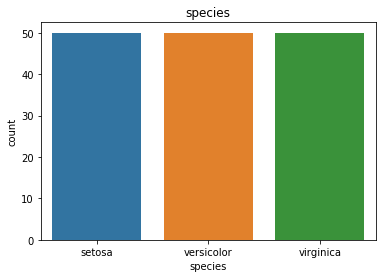

In [32]:
fig, ax = plt.subplots()
sns.countplot(x=d.columns[4], data=d)
plt.title(d.columns[4])
ax.set_xticklabels(iris.target_names)

plt.show()

Confirmamos así que el dataset está balanceado en cuanto a la variable dependiente, con 50 instancias para cada categoría.

### Boxplots

Ahora vamos a analizar las variables independientes.

Lo boxplots proporcionan una manera visual de entender las distribuciones de las variables numéricas, agregando además información estadística de las mismas, permitiendo el condicionamiento de los registros con respecto a una variable categórica.

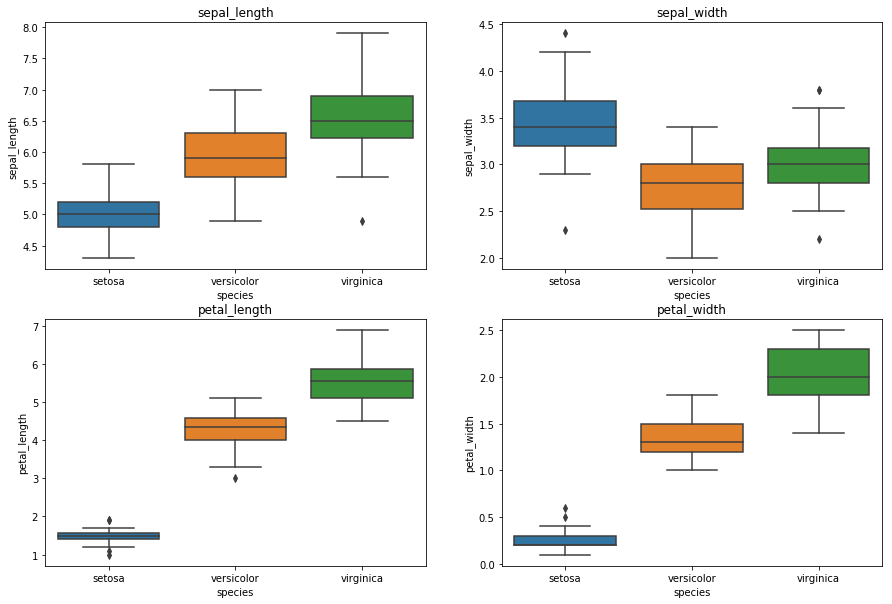

In [34]:
fig = plt.figure(figsize=(15,10))
i=1

for var_num in d.columns[0:4]:
    ax = fig.add_subplot(2, 2, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    sns.boxplot(x=d.columns[4], y=var_num, data=d)
    plt.title(var_num)
    ax.set_xticklabels(iris.target_names)
    i+=1

### Gráfico de violín

Un plot de **violin** permite analizar también la distribución de una variable numérica independientemente de las demás, combinando un boxplot con un gráfico de densidad.

In [31]:
d.columns[4]

'species'

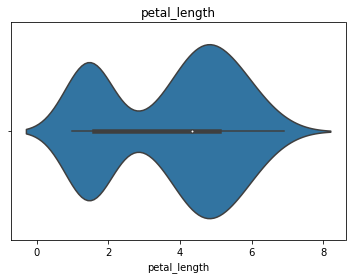

In [30]:
fig, ax = plt.subplots()
colname = d.columns[2]
sns.violinplot(x=colname, data=d)
plt.title(colname)

# Show the plot
plt.show()

Podemos ver, como lo sospechábamos al obtener las estadísticas descriptivas, que la variable 'petal length' presenta una distribución bimodal. Este plot además incluye un boxplot interno que muestra la mediana con un punto blanco y el percentil 25% y 75%.

En una misma figura podemos tener los plots de las 4 variables independientes. Esto lo logramos especificando los ejes de cada imágen. También podemos modificar el tamaño global de la figura.

Vamos a iterar en el dataframe con un ciclo que recorre las 4 variables numéricas, creando los plots correspondientes

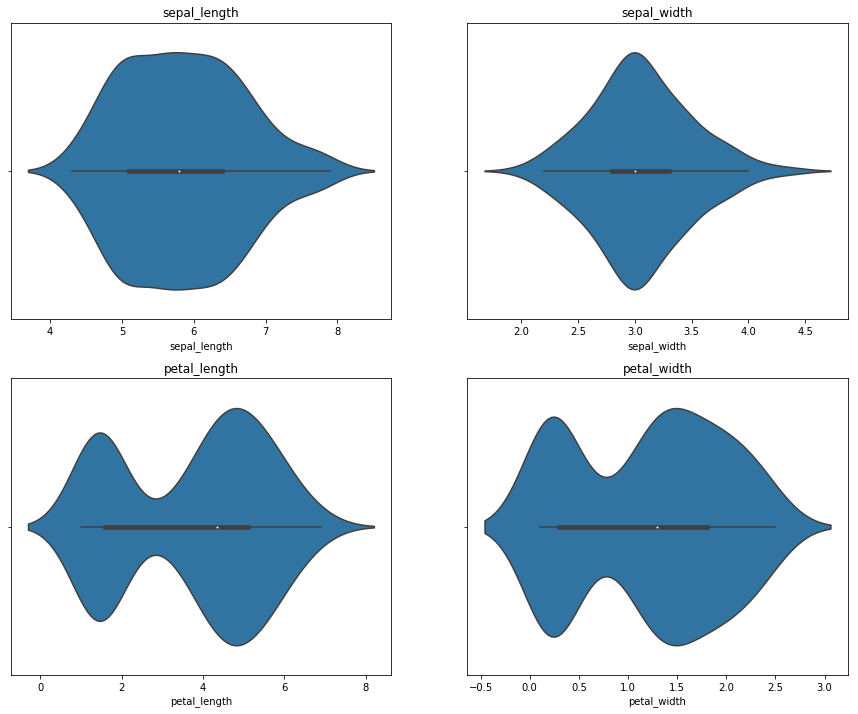

In [33]:
fig = plt.figure(figsize=(15,12))
i=1

for var_num in d.columns[0:4]:
    ax = fig.add_subplot(2, 2, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    sns.violinplot(x=var_num, data=d)
    plt.title(var_num)
    i+=1

Vemos que las variables tienen distribuciones muy diferentes. Sería mucho más informativo desde el punto de vista de la clasificación de la variable dependiente, poder tener una idea de la distribución de las variables independientes con respecto a cada categoría.
Esto lo logramos fácilmente poniendo una variable que controle el color (hue=matiz):

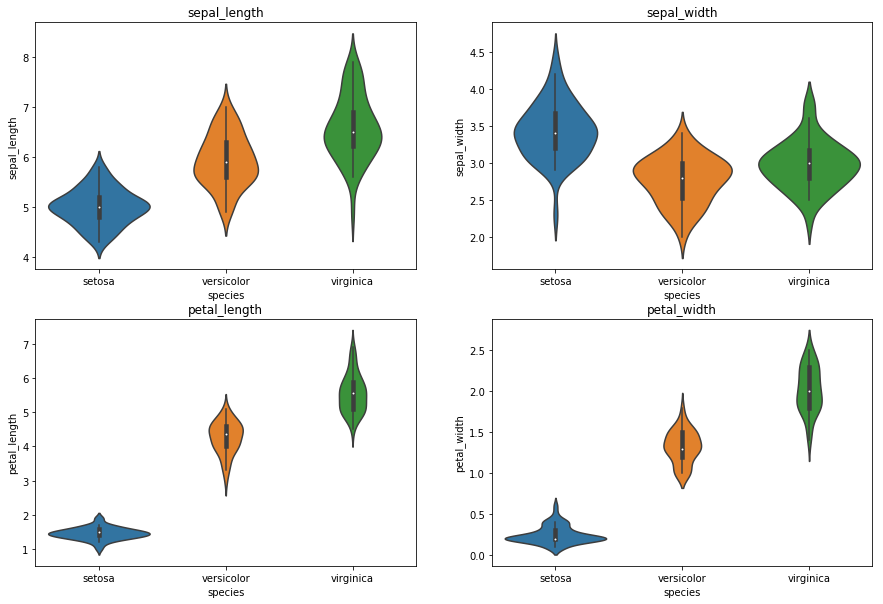

In [35]:
fig = plt.figure(figsize=(15,10))
i=1

for var_num in d.columns[0:4]:
    ax = fig.add_subplot(2, 2, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    sns.violinplot(x=d.columns[4], y=var_num, data=d)
    plt.title(var_num)
    ax.set_xticklabels(iris.target_names)
    i+=1

¿Qué podemos decir?

### Boxplots

Lo boxplots también proporciona una manera visual de entender las distribuciones de las variables numéricas, agregando además información estadística de las mismas, permitiendo el condicionamiento de los registros con respecto a una variable categórica.

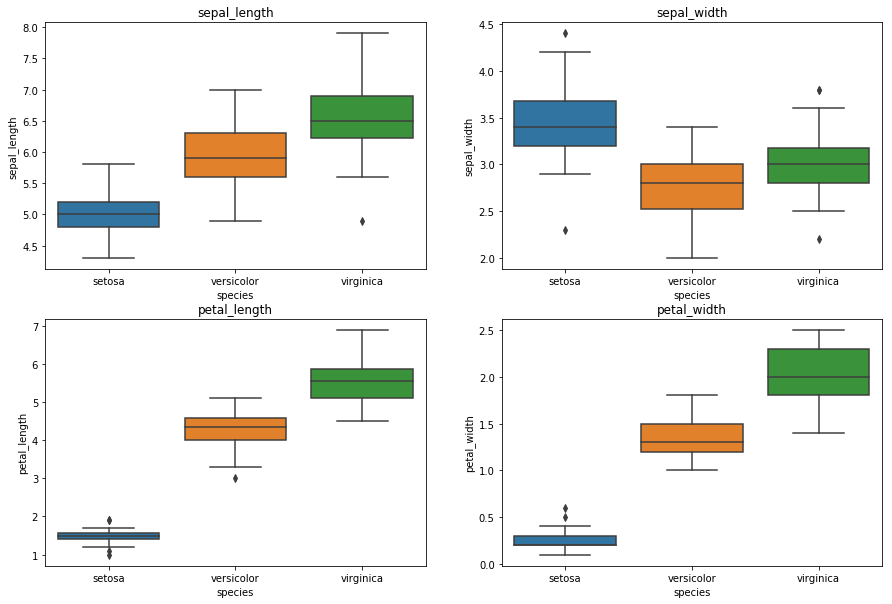

In [34]:
fig = plt.figure(figsize=(15,10))
i=1

for var_num in d.columns[0:4]:
    ax = fig.add_subplot(2, 2, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    sns.boxplot(x=d.columns[4], y=var_num, data=d)
    plt.title(var_num)
    ax.set_xticklabels(iris.target_names)
    i+=1

### Gráfico de densidades

Otra manera de ver información en un eje numérico univariado es analizando las distribuciones superpuestas. El plot KDE utiliza estimaciones de Kernel (no paramétricas) de cómo sería una distribución univariada o bivariada de un conjunto de datos.

In [36]:
setosa = d.loc[d.species == "0"]
virginica = d.loc[d.species == "1"]
versicolor = d.loc[d.species == "2"]

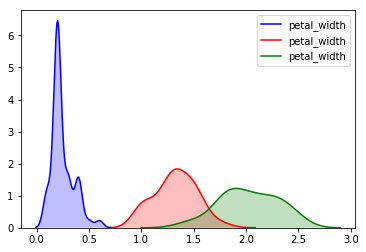

In [37]:
#ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length, cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(setosa.petal_width, shade=True, color="b")
ax = sns.kdeplot(virginica.petal_width, shade=True, color="r")
ax = sns.kdeplot(versicolor.petal_width, shade=True, color="g")

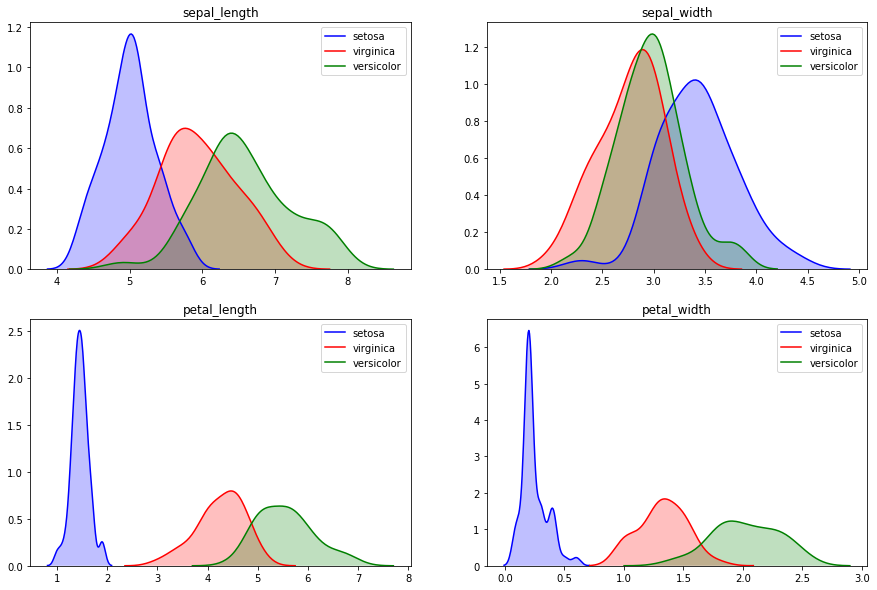

In [39]:
x=0
y=0
fig, axs = plt.subplots(figsize=[15, 10], ncols=2, nrows=2)
for var_num in d.columns[0:4]:
    sns.kdeplot(setosa[[var_num]].iloc[:,0], shade=True, color="b", ax=axs[y,x], label="setosa")
    sns.kdeplot(virginica[[var_num]].iloc[:,0], shade=True, color="r", ax=axs[y,x], label="virginica")
    sns.kdeplot(versicolor[[var_num]].iloc[:,0], shade=True, color="g", ax=axs[y,x], label="versicolor")
    axs[y,x].set_title(var_num)
    if x==0:
        x=1
    else:
        y=1
        x=0

A partir del análisis univariado, podemos ver que las mejores variables desde el punto de vista de discriminación de las clases de la variable objetivo son petal_width y petal_length. 

Vamos a analizar las distribuciones bivariadas de estas dos variables.

Text(0.5, 1.0, 'Petal length vs. sepal length')

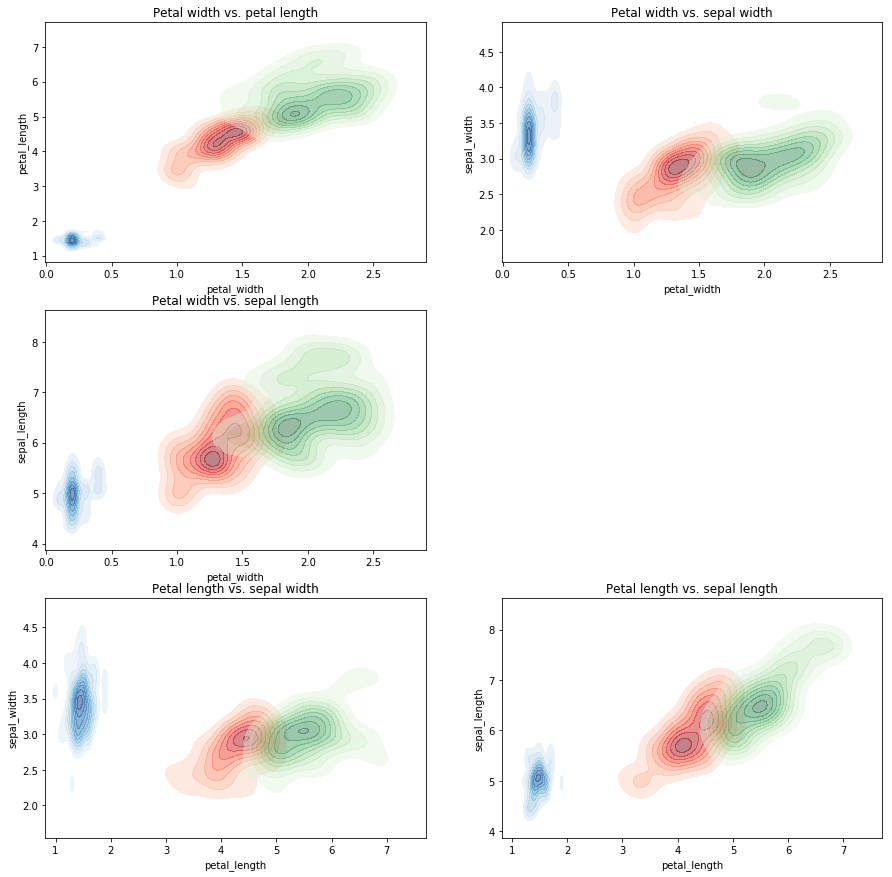

In [38]:
fig, axs = plt.subplots(figsize=[15, 15], ncols=2, nrows=3)

ax = sns.kdeplot(virginica.petal_width, virginica.petal_length, shade=True, shade_lowest=False, cmap="Reds", 
                 alpha=0.5, label="virginica", ax=axs[0,0])
ax = sns.kdeplot(versicolor.petal_width, versicolor.petal_length, shade=True, shade_lowest=False, cmap="Greens", 
                 alpha=0.4, label="versicolor", ax=axs[0,0])
ax = sns.kdeplot(setosa.petal_width, setosa.petal_length, shade=True, shade_lowest=False, cmap="Blues", 
                 alpha=0.5, label="setosa", ax=axs[0,0])
ax.set_title("Petal width vs. petal length")

ax = sns.kdeplot(virginica.petal_width, virginica.sepal_width, shade=True, shade_lowest=False, cmap="Reds", 
                 alpha=0.5, label="virginica", ax=axs[0,1])
ax = sns.kdeplot(versicolor.petal_width, versicolor.sepal_width, shade=True, shade_lowest=False, cmap="Greens", 
                 alpha=0.4, label="versicolor", ax=axs[0,1])
ax = sns.kdeplot(setosa.petal_width, setosa.sepal_width, shade=True, shade_lowest=False, cmap="Blues", 
                 alpha=0.5, label="setosa", ax=axs[0,1])
ax.set_title("Petal width vs. sepal width")

ax = sns.kdeplot(virginica.petal_width, virginica.sepal_length, shade=True, shade_lowest=False, cmap="Reds", 
                 alpha=0.5, label="virginica", ax=axs[1,0])
ax = sns.kdeplot(versicolor.petal_width, versicolor.sepal_length, shade=True, shade_lowest=False, cmap="Greens", 
                 alpha=0.4, label="versicolor", ax=axs[1,0])
ax = sns.kdeplot(setosa.petal_width, setosa.sepal_length, shade=True, shade_lowest=False, cmap="Blues", 
                 alpha=0.5, label="setosa", ax=axs[1,0])
ax.set_title("Petal width vs. sepal length")


# No quiero mostrar el gráfico de la segunda fila y segunda columna
axs[1,1].get_yaxis().set_visible(False)
axs[1,1].get_xaxis().set_visible(False)
sns.despine(left=True, bottom=True, right=True, ax=axs[1,1])

ax = sns.kdeplot(virginica.petal_length, virginica.sepal_width, shade=True, shade_lowest=False, cmap="Reds", 
                 alpha=0.5, label="virginica", ax=axs[2,0])
ax = sns.kdeplot(versicolor.petal_length, versicolor.sepal_width, shade=True, shade_lowest=False, cmap="Greens", 
                 alpha=0.4, label="versicolor", ax=axs[2,0])
ax = sns.kdeplot(setosa.petal_length, setosa.sepal_width, shade=True, shade_lowest=False, cmap="Blues", 
                 alpha=0.5, label="setosa", ax=axs[2,0])
ax.set_title("Petal length vs. sepal width")

ax = sns.kdeplot(virginica.petal_length, virginica.sepal_length, shade=True, shade_lowest=False, cmap="Reds", 
                 alpha=0.5, label="virginica", ax=axs[2,1])
ax = sns.kdeplot(versicolor.petal_length, versicolor.sepal_length, shade=True, shade_lowest=False, cmap="Greens", 
                 alpha=0.4, label="versicolor", ax=axs[2,1])
ax = sns.kdeplot(setosa.petal_length, setosa.sepal_length, shade=True, shade_lowest=False, cmap="Blues", 
                 alpha=0.5, label="setosa", ax=axs[2,1])
ax.set_title("Petal length vs. sepal length")

Con este tipo de plots bivariados, podemos eventualmente encontrar indicios de la capacidad predictiva de la interacción entre 2 variables, o confirmar los que pudimos obtener con una el análisis univariado.

### Scatter plots

Otra manera de ver las relaciones entre 2 variables es con scatter plots.

Vamos a ilustrar un particionamiento posible con los dataframes, usando el método *groupby*.

El método *groupby* retorna una tupla con la el de la categoría de la variable particionada ("0", "1", "2"), y un dataframe con los dataframes de los registros correspondientes a cada categoría, incluyendo el índice de los registros correspondientes.

Text(0.5, 1.0, 'Densidad de puntos: Petal width vs. petal length')

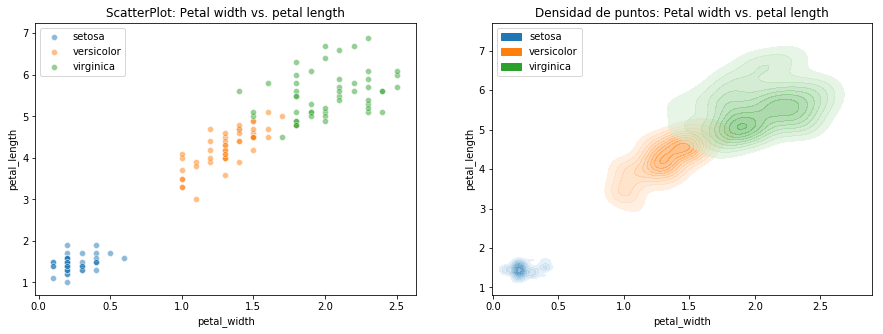

In [40]:
fig, axs = plt.subplots(figsize=[15, 5], ncols=2, nrows=1)

for name, group in d.groupby('species'):
    cat = categorias[name]
    sns.scatterplot(x="petal_width", y="petal_length", data=group, alpha=0.5, label=cat, ax=axs[0])    
axs[0].legend()
axs[0].set_title("ScatterPlot: Petal width vs. petal length")

for name, group in d.groupby('species'):
    cat = categorias[name]
    sns.kdeplot(data=group["petal_width"], data2=group["petal_length"], shade=True, shade_lowest=False, alpha=0.5,
                label=cat, ax=axs[1])    
axs[1].legend(loc=2)
axs[1].set_title("Densidad de puntos: Petal width vs. petal length")

### Pairplot

Un plot muy útil que resume el análisis univariado y el bivariado es el *pair plot*, que crea una matriz de plots con gráficos de densidad en la diagonal y scatterplots en las demás celdas.

<Figure size 1080x1080 with 0 Axes>

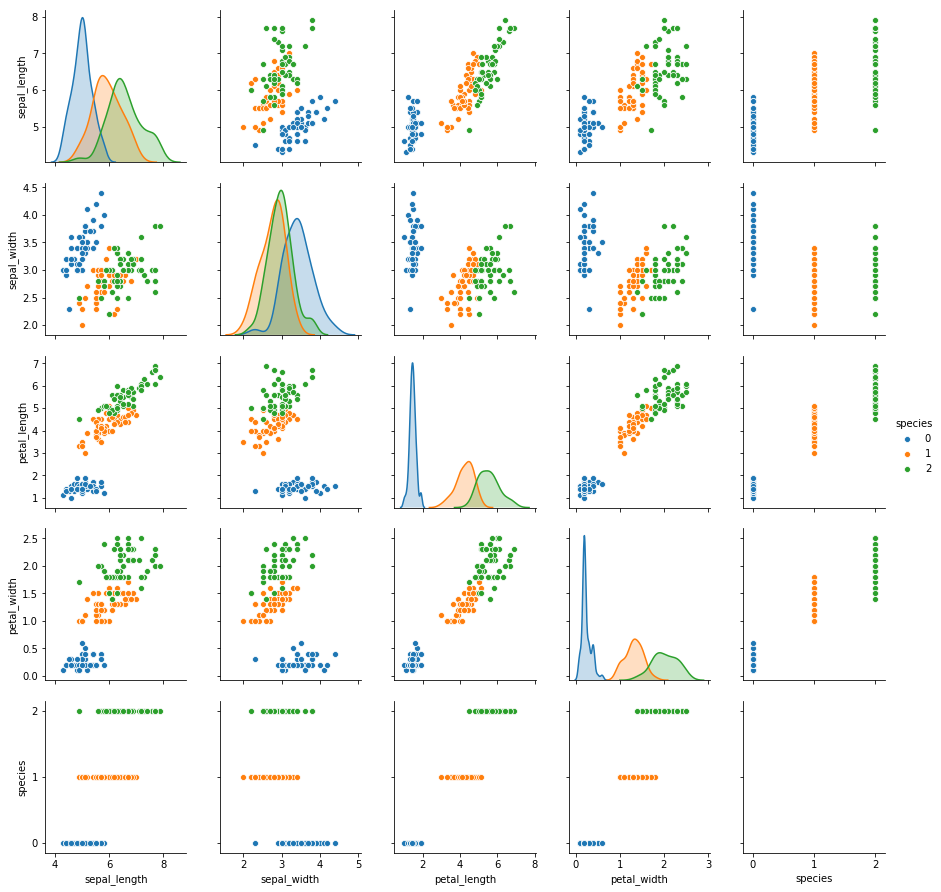

In [41]:
plt.figure(figsize=(15,15))
ax = sns.pairplot(d, hue="species")

## Clasificación a partir de K-NN

El algoritmo de K-NN requiere la especificación del parámetro K, con el número de vecinos que se considerarán para tomar la decisión de clasificación (recuerden que K-NN también permite hacer regresión).

Primero vamos a separar las variables predictivas de la variable objetivo:

In [42]:
x=d.iloc[:,0:4]
y=d["species"]

In [43]:
x[0:5]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: object

A partir de las cuatro variables independientes (largo y ancho de pétalo y de sépalo), vamos a determinar la especie de la flor usando K-NN.
Definimos un valor de K=5 y utilizamos el mismo dataset de 150 instancias para evaluar los resultados del algoritmo (las clases predichas), comparándolos con los reales (especies reales de cada registro).

In [45]:
k=5
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Ya tenemos el modelo "aprendido" con el dataset de 150 instancias de Iris.
Vamos ahora a evaluarlo sobre ese mismo dataset para poder ver los éxitos y errores de la predicción. 

In [46]:
y_pred = knn.predict(x)
print("Clases reales   : ", y)
print("Clases predichas: ", y_pred)

Clases reales   :  0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: object
Clases predichas:  ['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '1'
 '2' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '2' '1' '1' '1' '1' '1' '1'
 '1' '

# Métricas y matriz de confusión

Vemos que hay unos cuantos errores, para poder analizar mejor los resultados, vamos a construir una matriz de confusión y a aplicar métricas de clasificación.

En las filas quedarán las clases reales, en las columnas las predichas.

([<matplotlib.axis.YTick at 0x1deed297c50>,
 <a list of 3 Text yticklabel objects>)

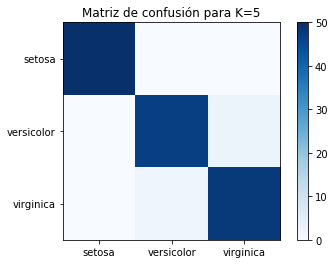

In [47]:
cm= metrics.confusion_matrix(y, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión para K=5")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, iris.target_names)
plt.yticks(tick_marks, iris.target_names)

<font color='red'>Realice las siguientes tareas (para poder hacerlas utilicen cuando puedan sklearn.metrics, sin embargo, para ciertas métricas, es necesario realizar los cálculos a mano):</font>

1. <font color='red'>Obtenga e interprete los resultados de exactitud y kappa.</font>

2. <font color='red'>Para cada una de las clases, calculen e interpreten los valores de las métricas de precisión, recall, especificidad, f1 score.</font>

3. <font color='red'>Intenten con otros valores de K, y encuentren el mejor modelo K-NN.</font>

In [48]:
print(cm)
print("Exactitud: ", metrics.accuracy_score(y, y_pred))
print("Kappa    : ", metrics.cohen_kappa_score(y, y_pred))
print("-------------------------------------")
print("Metricas para la categoría ", iris.target_names[0])
print("Precisión     : ", metrics.precision_score(y, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y, y_pred, labels=[0], average='macro'))
VN = np.sum(cm[1:3,1:3])
FP = np.sum(cm[0,1:3])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y, y_pred, labels=[0], average='macro'))
print("-------------------------------------")
print("Metricas para la categoría ", iris.target_names[1])
print("Precisión     : ", metrics.precision_score(y, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y, y_pred, labels=[1], average='macro'))
VN = 98
FP = 2
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y, y_pred, labels=[1], average='macro'))
print("-------------------------------------")
print("Metricas para la categoría ", iris.target_names[2])
print("Precisión     : ", metrics.precision_score(y, y_pred, labels=[2], average='macro'))
print("Recall        : ", metrics.recall_score(y, y_pred, labels=[2], average='macro'))
VN = np.sum(cm[0:2,0:2])
FP = np.sum(cm[2,0:2])
specificity = VN/(VN+FP)
print("Especificidad : ", specificity)
print("F1-score      : ", metrics.f1_score(y, y_pred, labels=[2], average='macro'))

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]
Exactitud:  0.9666666666666667
Kappa    :  0.95
-------------------------------------
Metricas para la categoría  setosa
Precisión     :  1.0
Recall        :  1.0
Especificidad :  1.0
F1-score      :  1.0
-------------------------------------
Metricas para la categoría  versicolor
Precisión     :  0.9591836734693877
Recall        :  0.94
Especificidad :  0.98
F1-score      :  0.9494949494949495
-------------------------------------
Metricas para la categoría  virginica
Precisión     :  0.9411764705882353
Recall        :  0.96
Especificidad :  0.9797979797979798
F1-score      :  0.9504950495049505


Obtuvimos un muy buen nivel de exactitud del 96.7% evaluando sobre el mismo set de aprendizaje.
Ademas muy buenos scores globales para todas las clases. De hecho, la clase setosa se pudo tratar a la perfección.

Intentemos con otros valores de  K.

In [50]:
ks=[1,3,5,7,9,11]
for k in ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    y_pred = knn.predict(x)
    print("Con K = ", k, ", exactitud: ", metrics.accuracy_score(y, y_pred))

Con K =  1 , exactitud:  1.0
Con K =  3 , exactitud:  0.96
Con K =  5 , exactitud:  0.9666666666666667
Con K =  7 , exactitud:  0.9733333333333334
Con K =  9 , exactitud:  0.98
Con K =  11 , exactitud:  0.9733333333333334


Los resultados anteriores nos llevarían a pensar que con K=1 se obtiene un modelo con una predicción "perfecta".

Como lo veremos a continuación. Este no es para nada el caso, pues estamos violando una de las máximas de la evaluación de los modelos de aprendizaje supervisado: evaluar sobre el mismo set de entrenamiento.

Esta evaluación produce resultados que subestiman el error de aprendizaje, y no da una indicación clara del poder de generalización del modelo sobre datos diferentes a los encontrados durante el proceso de aprendizaje.

## Protocolos de evaluación

Vamos ahora a evaluar los modelos que calculamos con diferentes protocolos de evaluación para tener una idea más clara de la calidad de los mismos, e identificar posibles casos de modelos que sufren de overfitting (sobreaprendizaje).

### Holdout (split)

Vamos a separar el dataset en 2 partes: 60% de los datos se van a utilizar para aprender, 40% para evaluar el modelo de clasificación.
Utilizamos el método *train_test_split* de scikit-learn, que se encarga de hacer el particionamiento aleatorio: 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=12345, stratify=y)

Los parámetros de este método son:
- train_size o test_size: define la proporción del dataset que se irán al training set o al test set.
- random_state: define la **semilla** a utilizar para incializar el generador de números pseudo-aleatorios. Se requiere que los resultados obtenidos con la partición sean eventualmente reproducibles. La semilla aleatoria debe inicalizarse en el mismo valor para obtener los mismos resultados.
- stratify: indica un array con los valores de una variable que se quiere tener en cuenta en el particionamiento, de tal manera que las proporciones originales se conserven después de la partición.

In [52]:
acc_train_vec=[]
acc_test_vec=[]
k_vec= np.arange(1,31,2)
for k in k_vec:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    acc_train_vec.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = knn.predict(X_test)
    acc_test_vec.append(metrics.accuracy_score(y_test, y_pred))
print(acc_train_vec)
print(acc_test_vec)
print(k_vec)

[1.0, 0.9777777777777777, 0.9555555555555556, 0.9666666666666667, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9555555555555556, 0.9444444444444444, 0.9444444444444444, 0.9333333333333333]
[0.9666666666666667, 0.9833333333333333, 0.95, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.95, 0.95, 0.9333333333333333, 0.95, 0.95, 0.95, 0.9166666666666666, 0.9333333333333333, 0.9166666666666666]
[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]


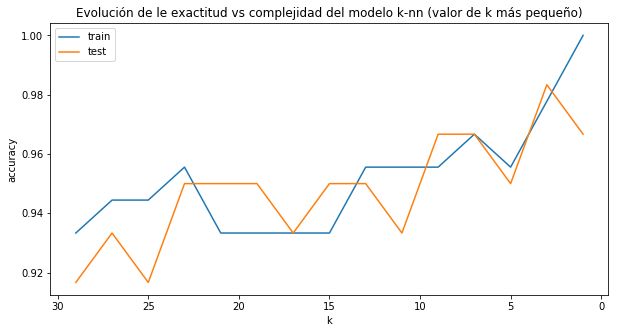

In [53]:
plt.figure(figsize=(10,5))
ax = plt.gca() # get current axis
plt.plot(k_vec, acc_train_vec)
plt.plot(k_vec, acc_test_vec)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Evolución de le exactitud vs complejidad del modelo k-nn (valor de k más pequeño)')
plt.legend(['train', 'test'])

Vemos que con k=1, encontramos la mayor tasa de exactitud cuando se valua con el training set, pero con el test set hallamos el mejor desempeño con k=3.

Hay que tener en cuenta que estos resultados se obtuvieron con un mismo particionamiento aleatorio, que esta muy sujeto a incertidumbre. ¿Qué pasaría si se repite este procedimiento con otros particionamientos?

<font color='red'>**TODO:** Realicen varias particiones aleatorias con las mismas proporciones y evalúe los resultados del modelo.</font>

### K-fold cross-validation

Este protocolo de evaluación consiste en dividir el dataset en K pedazos de igual tamaño, y analizar el rendimiento de un modelo aprendido que va rotando sobre k-1 subconjuntos y evaluado en el subconjunto faltante (El K del K-fold no tiene niguna relación con el K del K-NN). 
En el caso de clasificación, particionamiento se hace aleatoriamente y de manera estratificada con respecto a la variable objetivo.
Las métricas finales son las agregaciones de las evaluaciones de los K modelos.

#### cross_val_score

*scikit-learn* conta con una función que permite repetir el proceso de particionamiento y evaluación del K-fold CV. Se trata de **cross_val_score**, que recibe los siguientes parámetros:
- la instancia del modelo que se quiere evaluar, 
- los datos de las variables independiente, 
- los datos reales de la variable dependiente, 
- cv: el número de veces que se va a repetir el proceso de cross-validation
- scoring: la métrica que se desea evaluar

In [54]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
exactitudes = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
exactitudes

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.93333333, 1.        , 1.        , 1.        ])

Vemos que los scores de las 10 iteraciones del CV dan resultados entre 86.7% y 100%. Podemos obtener un intervalo de confianza del 95% para estimar el valor de la exactitud generalizada.

In [55]:
print("Exactitudes: %0.2f (+/- %0.2f)" % (exactitudes.mean(), exactitudes.std() * 2))

Exactitudes: 0.97 (+/- 0.09)


#### cross_validate

El problema es que con este método solo se puede evaluar una sola métrica a la vez, y que debe ser una métrica global, o tratar una clasificación binaria.

El método **cross_validate** permite evaluar mas de una métrica a la vez, pero en el caso de categorías que no sean binarias, las métricas de precision, recall y f1 son agregadas. La salida de este método es un directorio con las métricas resultantes, que además incluye el tiempo de aprendizaje y de evaluación de cada iteración.

In [56]:
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
scores = cross_validate(knn, x, y, scoring=scoring, cv=10, return_train_score=False)

for key in scores:
    score = scores[key]
    print("%s: %0.2f (+/- %0.2f)" % (key, score.mean(), score.std() * 2))

fit_time: 0.00 (+/- 0.00)
score_time: 0.00 (+/- 0.00)
test_accuracy: 0.97 (+/- 0.09)
test_precision_weighted: 0.97 (+/- 0.07)
test_recall_weighted: 0.97 (+/- 0.09)
test_f1_weighted: 0.97 (+/- 0.09)


#### Iteradores de cross-validation: KFold, StratifiedKFold, LeaveOneOut

Podemos utilizar también clases específicas para los particionamientos de los datos que permiten mucha más flexibilidad. Las clases **KFold**, **RepeatedKFold**, y **LeaveOneOut** se limitan a crear iteradores que retornan los subconjuntos de training y test.

Es importante anotar que estos iteradores parten del supuesto de independencia de los registros, por lo que es necesario barajarlos previamente.

KFold solo particiona los datos en subconjuntos de items.

In [57]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=10, shuffle=True)
acc_test_vec=[]

In [58]:
for indices_train, indices_test in kf.split(x):
    #print("%s %s" % (indices_train, indices_test))
    knn.fit(x.iloc[indices_train], y.iloc[indices_train])
    y_pred = knn.predict(x.iloc[indices_test])
    acc_test_vec.append(metrics.accuracy_score(y.iloc[indices_test], y_pred))  
acc_test_vec

[1.0,
 0.9333333333333333,
 1.0,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 1.0,
 0.9333333333333333,
 1.0]

Un caso particular es cuando el K del KFold es igual al tamaño de la muestra. En tal caso, se obtiene un protocolo de LeaveOneOut. En este caso los resultados para cada test set (de tamaño 1) solo pueden ser del 100% o del 0%.

In [59]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
loocv = LeaveOneOut()
acc_test_vec=[]
for indices_train, indices_test in loocv.split(x):
    #print("%s %s" % (indices_train, indices_test))
    knn.fit(x.iloc[indices_train], y.iloc[indices_train])
    y_pred = knn.predict(x.iloc[indices_test])
    acc_test_vec.append(metrics.accuracy_score(y[indices_test], y_pred))  
np.mean(acc_test_vec)

0.96

Una mejora se logra con el StratifiedKFold, pues se tiene en cuenta las proporciones de la variable objetivo en la partición, controlando un poco un posible sesgo en la aleatoriedad.

In [60]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
acc_test_vec=[]
for indices_train, indices_test in kf.split(x, y):
    knn.fit(x.iloc[indices_train], y.iloc[indices_train])
    y_pred = knn.predict(x.iloc[indices_test])
    acc_test_vec.append(metrics.accuracy_score(y.iloc[indices_test], y_pred))  
acc_test_vec

[0.9333333333333333,
 1.0,
 0.9333333333333333,
 0.9333333333333333,
 0.8666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9333333333333333]